# Supermarket Sales DB Analysis 

In [1]:
import datetime
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ipywidgets import widgets

In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\205965_451952_bundle_archive\\supermarket_sales.csv") # read the file to visualize
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.Branch.unique()

array(['A', 'C', 'B'], dtype=object)

In [4]:
new_df=df.loc[(df['City'] == 'Mandalay') & (df['Gender'] == 'Female') & (df['Quantity']>1)]
new_df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4
28,145-94-9061,B,Mandalay,Normal,Female,Food and beverages,88.36,5,22.090,463.890,1/25/2019,19:48,Cash,441.80,4.761905,22.090,9.6


# Branch Frequency

Text(0.5, 1.0, 'Branch Frequency')

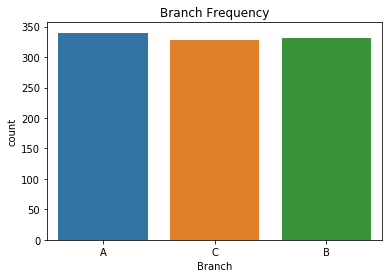

In [5]:
import seaborn as sns 
sns.countplot(x="Branch", data = df).set_title("Branch Frequency")

In [6]:
df['Frequency of Product'] = df['Product line'].map(df['Product line'].value_counts())
df.head(4)
#map function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.) 
#value_counts function returns the count of all unique values in the index.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Frequency of Product
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,152
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,170
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,160
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,152


In [7]:
forbranchfreq = df[['Product line', 'Frequency of Product']]
forbranchfreq.head(5)

,Product line,Frequency of Product
0,Health and beauty,152
1,Electronic accessories,170
2,Home and lifestyle,160
3,Health and beauty,152
4,Sports and travel,166


In [8]:
forbranchfreq100 = forbranchfreq.groupby(['Product line']).sum()
forbranchfreq120 = forbranchfreq100.sort_values(by=['Frequency of Product'],  ascending=False)
forbranchfreq120 = DataFrame.drop_duplicates(forbranchfreq120)
forbranchfreq120.head(3)

,Frequency of Product
Product line,
Fashion accessories,31684
Food and beverages,30276
Electronic accessories,28900


# Frequency of Product

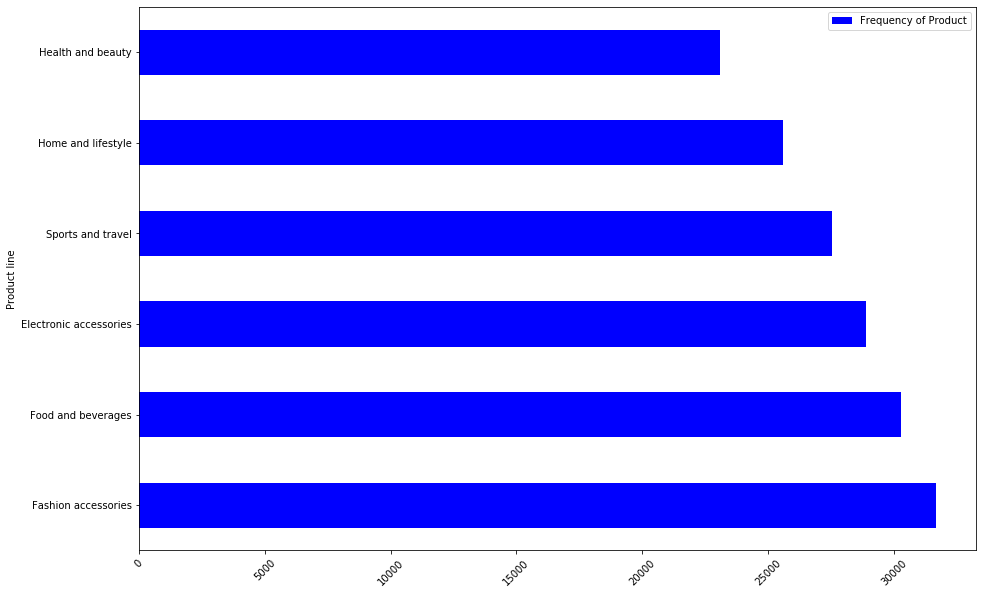

In [9]:
forbranchfreq120.plot(kind="barh", color = 'blue',figsize=(15,10))
plt.xticks(rotation=45);
plt.savefig("figure1.png")

# Payment channel Frequency

Text(0.5, 1.0, 'Payment Channel Frequency')

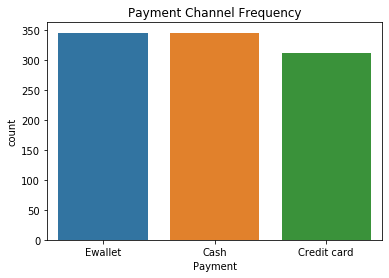

In [10]:
sns.countplot(x="Payment", data = df).set_title("Payment Channel Frequency")

In [11]:
df['STime'] = df['Time'].str[:2]
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Frequency of Product,STime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,152,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,170,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,160,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,152,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,166,10


In [12]:
fortime = df[['Total', 'STime']]
fortime = fortime.groupby(['STime']).sum()
fortime.head(5)

,Total
STime,
10,31421.4810
11,30377.3295
12,26065.8825
13,34723.2270
14,30828.3990


# Total by hour

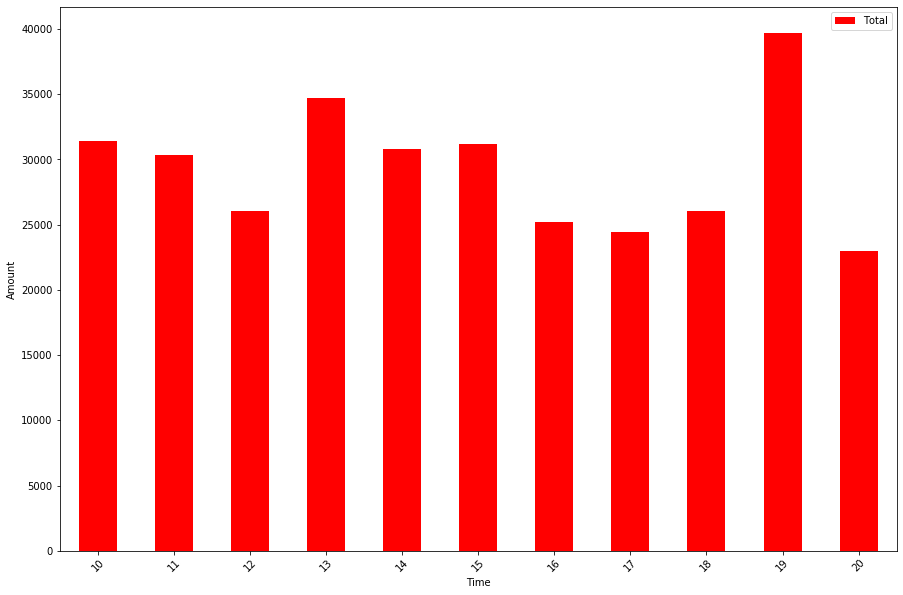

In [13]:
fortime.plot(kind="bar", color = 'red',figsize=(15,10))
plt.xticks(rotation=45);
plt.xlabel("Time")
plt.ylabel("Amount")
plt.savefig("figure2.png")

In [14]:
forcustomertype = df[['Customer type','STime','Total']]
forcustomertype = DataFrame.drop_duplicates(forcustomertype)
forcustomertype

,Customer type,STime,Total
0,Member,13,548.9715
1,Normal,10,80.2200
2,Normal,13,340.5255
3,Member,20,489.0480
4,Normal,10,634.3785
...,...,...,...
995,Normal,13,42.3675
996,Normal,17,1022.4900
997,Member,13,33.4320
998,Normal,15,69.1110


In [15]:
pivottable=pd.pivot_table(forcustomertype,index=["Customer type"],columns=["STime"],values=["Total"],aggfunc=np.sum,margins_name='Amount',fill_value=0)
pivottable=pivottable.style.format("{:,.0f}")
pivottable


In [16]:
pivottable.to_excel("pivottableforcustomertype.xlsx")

In [17]:
dtb=df[['Branch','Total','Date']]
dtb

,Branch,Total,Date
0,A,548.9715,1/5/2019
1,C,80.2200,3/8/2019
2,A,340.5255,3/3/2019
3,A,489.0480,1/27/2019
4,A,634.3785,2/8/2019
...,...,...,...
995,C,42.3675,1/29/2019
996,B,1022.4900,3/2/2019
997,A,33.4320,2/9/2019
998,A,69.1110,2/22/2019


In [18]:
dtb1=dtb.dropna()
dtb1

,Branch,Total,Date
0,A,548.9715,1/5/2019
1,C,80.2200,3/8/2019
2,A,340.5255,3/3/2019
3,A,489.0480,1/27/2019
4,A,634.3785,2/8/2019
...,...,...,...
995,C,42.3675,1/29/2019
996,B,1022.4900,3/2/2019
997,A,33.4320,2/9/2019
998,A,69.1110,2/22/2019


In [19]:
dtb1.fillna(0)

,Branch,Total,Date
0,A,548.9715,1/5/2019
1,C,80.2200,3/8/2019
2,A,340.5255,3/3/2019
3,A,489.0480,1/27/2019
4,A,634.3785,2/8/2019
...,...,...,...
995,C,42.3675,1/29/2019
996,B,1022.4900,3/2/2019
997,A,33.4320,2/9/2019
998,A,69.1110,2/22/2019


In [20]:
dtb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Branch  1000 non-null   object 
 1   Total   1000 non-null   float64
 2   Date    1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 31.2+ KB


In [21]:
dtb1['Date']=pd.to_datetime(dtb1['Date'])
dtb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Branch  1000 non-null   object        
 1   Total   1000 non-null   float64       
 2   Date    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 31.2+ KB


In [22]:
dtb1

,Branch,Total,Date
0,A,548.9715,2019-01-05
1,C,80.2200,2019-03-08
2,A,340.5255,2019-03-03
3,A,489.0480,2019-01-27
4,A,634.3785,2019-02-08
...,...,...,...
995,C,42.3675,2019-01-29
996,B,1022.4900,2019-03-02
997,A,33.4320,2019-02-09
998,A,69.1110,2019-02-22


In [23]:
dtb1['Month']= dtb1['Date'].dt.strftime('%m')
dtb1.sort_values(by='Month', inplace = True)
dtb1

,Branch,Total,Date,Month
0,A,548.9715,2019-01-05,01
317,C,392.6475,2019-01-10,01
694,C,497.0700,2019-01-16,01
695,A,458.6925,2019-01-29,01
696,A,113.5680,2019-01-01,01
...,...,...,...,...
318,C,218.0745,2019-03-11,03
688,C,153.0480,2019-03-13,03
323,A,324.2925,2019-03-08,03
704,B,835.2855,2019-03-02,03


In [24]:
dtb2= dtb1[['Branch','Total','Month']].groupby([dtb1['Month'],dtb1['Branch']]).sum()
dtb2.sort_values('Month')
dtb2

Total
Month Branch            
01    A       38681.1285
      B       37176.0585
      C       40434.6810
02    A       29860.1205
      B       34424.2710
      C       32934.9825
03    A       37659.1215
      B       34597.3425
      C       37199.0430

# Branch Total by Month

Text(0, 0.5, 'Total')

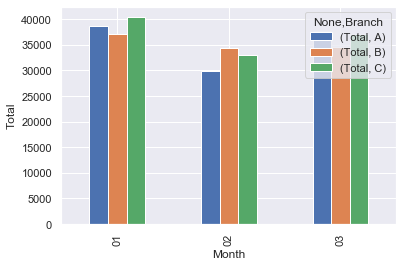

In [25]:
sns.set()
pd.pivot_table(dtb2, index=(['Month']), columns=(['Branch']), values=(['Total']), aggfunc=np.sum, margins=False).plot(kind= 'bar')
plt.ylabel("Total")

In [26]:
df4=df[['Branch','Product line','Gender','gross income','Date']]
df4

,Branch,Product line,Gender,gross income,Date
0,A,Health and beauty,Female,26.1415,1/5/2019
1,C,Electronic accessories,Female,3.8200,3/8/2019
2,A,Home and lifestyle,Male,16.2155,3/3/2019
3,A,Health and beauty,Male,23.2880,1/27/2019
4,A,Sports and travel,Male,30.2085,2/8/2019
...,...,...,...,...,...
995,C,Health and beauty,Male,2.0175,1/29/2019
996,B,Home and lifestyle,Female,48.6900,3/2/2019
997,A,Food and beverages,Male,1.5920,2/9/2019
998,A,Home and lifestyle,Male,3.2910,2/22/2019


In [27]:
df4['Date']=pd.to_datetime(df4['Date'])
df4

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Branch,Product line,Gender,gross income,Date
0,A,Health and beauty,Female,26.1415,2019-01-05
1,C,Electronic accessories,Female,3.8200,2019-03-08
2,A,Home and lifestyle,Male,16.2155,2019-03-03
3,A,Health and beauty,Male,23.2880,2019-01-27
4,A,Sports and travel,Male,30.2085,2019-02-08
...,...,...,...,...,...
995,C,Health and beauty,Male,2.0175,2019-01-29
996,B,Home and lifestyle,Female,48.6900,2019-03-02
997,A,Food and beverages,Male,1.5920,2019-02-09
998,A,Home and lifestyle,Male,3.2910,2019-02-22


In [28]:
df4['Month']= df4['Date'].dt.strftime('%m')
df4

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Branch,Product line,Gender,gross income,Date,Month
0,A,Health and beauty,Female,26.1415,2019-01-05,01
1,C,Electronic accessories,Female,3.8200,2019-03-08,03
2,A,Home and lifestyle,Male,16.2155,2019-03-03,03
3,A,Health and beauty,Male,23.2880,2019-01-27,01
4,A,Sports and travel,Male,30.2085,2019-02-08,02
...,...,...,...,...,...,...
995,C,Health and beauty,Male,2.0175,2019-01-29,01
996,B,Home and lifestyle,Female,48.6900,2019-03-02,03
997,A,Food and beverages,Male,1.5920,2019-02-09,02
998,A,Home and lifestyle,Male,3.2910,2019-02-22,02


In [29]:
df4.dropna()

,Branch,Product line,Gender,gross income,Date,Month
0,A,Health and beauty,Female,26.1415,2019-01-05,01
1,C,Electronic accessories,Female,3.8200,2019-03-08,03
2,A,Home and lifestyle,Male,16.2155,2019-03-03,03
3,A,Health and beauty,Male,23.2880,2019-01-27,01
4,A,Sports and travel,Male,30.2085,2019-02-08,02
...,...,...,...,...,...,...
995,C,Health and beauty,Male,2.0175,2019-01-29,01
996,B,Home and lifestyle,Female,48.6900,2019-03-02,03
997,A,Food and beverages,Male,1.5920,2019-02-09,02
998,A,Home and lifestyle,Male,3.2910,2019-02-22,02


In [30]:
df4['Month'] = df4['Month'].str[-1]
df4

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Branch,Product line,Gender,gross income,Date,Month
0,A,Health and beauty,Female,26.1415,2019-01-05,1
1,C,Electronic accessories,Female,3.8200,2019-03-08,3
2,A,Home and lifestyle,Male,16.2155,2019-03-03,3
3,A,Health and beauty,Male,23.2880,2019-01-27,1
4,A,Sports and travel,Male,30.2085,2019-02-08,2
...,...,...,...,...,...,...
995,C,Health and beauty,Male,2.0175,2019-01-29,1
996,B,Home and lifestyle,Female,48.6900,2019-03-02,3
997,A,Food and beverages,Male,1.5920,2019-02-09,2
998,A,Home and lifestyle,Male,3.2910,2019-02-22,2


In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Branch        1000 non-null   object        
 1   Product line  1000 non-null   object        
 2   Gender        1000 non-null   object        
 3   gross income  1000 non-null   float64       
 4   Date          1000 non-null   datetime64[ns]
 5   Month         1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


In [32]:
df4['Month'] = df4['Month'].astype(str).astype(int)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Branch        1000 non-null   object        
 1   Product line  1000 non-null   object        
 2   Gender        1000 non-null   object        
 3   gross income  1000 non-null   float64       
 4   Date          1000 non-null   datetime64[ns]
 5   Month         1000 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 43.1+ KB


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df4['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [34]:
#assign all the widgets we are going to use
BR=widgets.Dropdown(
description = 'Gender:  ',
value='Male',
options=list(df4['Gender'].unique().tolist())
)

PL = widgets.Dropdown(
options = list(df4['Product line'].unique()),
value = 'Health and beauty',
description = 'Product Line:',
)

use_Date =widgets.Checkbox(
description = 'Date: ',
value=True,
)
month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=3.0,
    step=1.0,
    description='Month:',
    continuous_update=False
)

container = widgets.HBox(children=[use_Date, month])

# Assign an empty figure widget with one trace

trace1 = go.Histogram(x=df['Branch'], opacity=0.75)          
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Supermarket Sales DB'
                        ),
                        barmode='group'
                    ))                  





In [35]:
# Let now write a function that will handle the input from the widgets, 
#and alter the state of the graph.
def validate():
    if PL.value in df4['Product line'].unique() and BR.value in df4['Gender'].unique():
        return True
    else:
        return False
    
def response(change):
    if validate():
        if use_Date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df4['Month'] == month.value, df4['Gender'] == BR.value, df4['Product line'] == PL.value)]
            
            temp_df4 = df4[filter_list]
            
        else:
            
             filter_list = [i and j for i, j in
                               zip(df4['Gender'] == BR.value, df4['Product line'] == PL.value)]
        temp_df4 = df4[filter_list]   
        x1 = temp_df4['Branch']
            
        with g.batch_update():
                g.data[0].x = x1
                g.layout.barmode = 'group'
                g.layout.xaxis.title = 'Branch'
                g.layout.yaxis.title = 'Gross income'
                
PL.observe(response, names="value")
BR.observe(response, names="value")
month.observe(response, names="value")
use_Date.observe(response, names="value")

# Supermarket Branch sales sorted by Month, Product Line or Gender

In [36]:
container2 = widgets.HBox([PL, BR])
widgets.VBox([container,
              container2,
              g])